<a href="https://colab.research.google.com/github/edwinmartin28/Animal-Detection-And-Alerting-System/blob/main/Animal-Detection-And-Alerting-System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access files and folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Downloads and extracts a dataset from Kaggle to a specific directory in Google Drive
# Run this command only once during the initial execution to download the dataset
# This command downloads a large dataset (10GB) and stores it in the drive, which may fill up the storage faster
#!export KAGGLE_USERNAME=ashikkj && export KAGGLE_KEY=a00c6b7418ecbb0299d5007cddd7c6ad && kaggle datasets download antoreepjana/animals-detection-images-dataset --unzip -p /content/drive/MyDrive/MyAnimalsDataset

In [3]:
# Importing necessary libraries and modules for image processing, deep learning, and visualization
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

In [4]:
# Setting the directories for the training and testing datasets
train_dir= '/content/drive/MyDrive/MyAnimalsDataset/train'
test_dir= '/content/drive/MyDrive/MyAnimalsDataset/test'

Bear sample size :  87 

Bull sample size :  47 

Cheetah sample size :  132 

Crocodile sample size :  108 

Elephant sample size :  155 

Jaguar sample size :  100 

Leopard sample size :  123 

Lion sample size :  208 

Rhinoceros sample size :  214 

Tiger sample size :  313 

training data size : 1487


<BarContainer object of 10 artists>

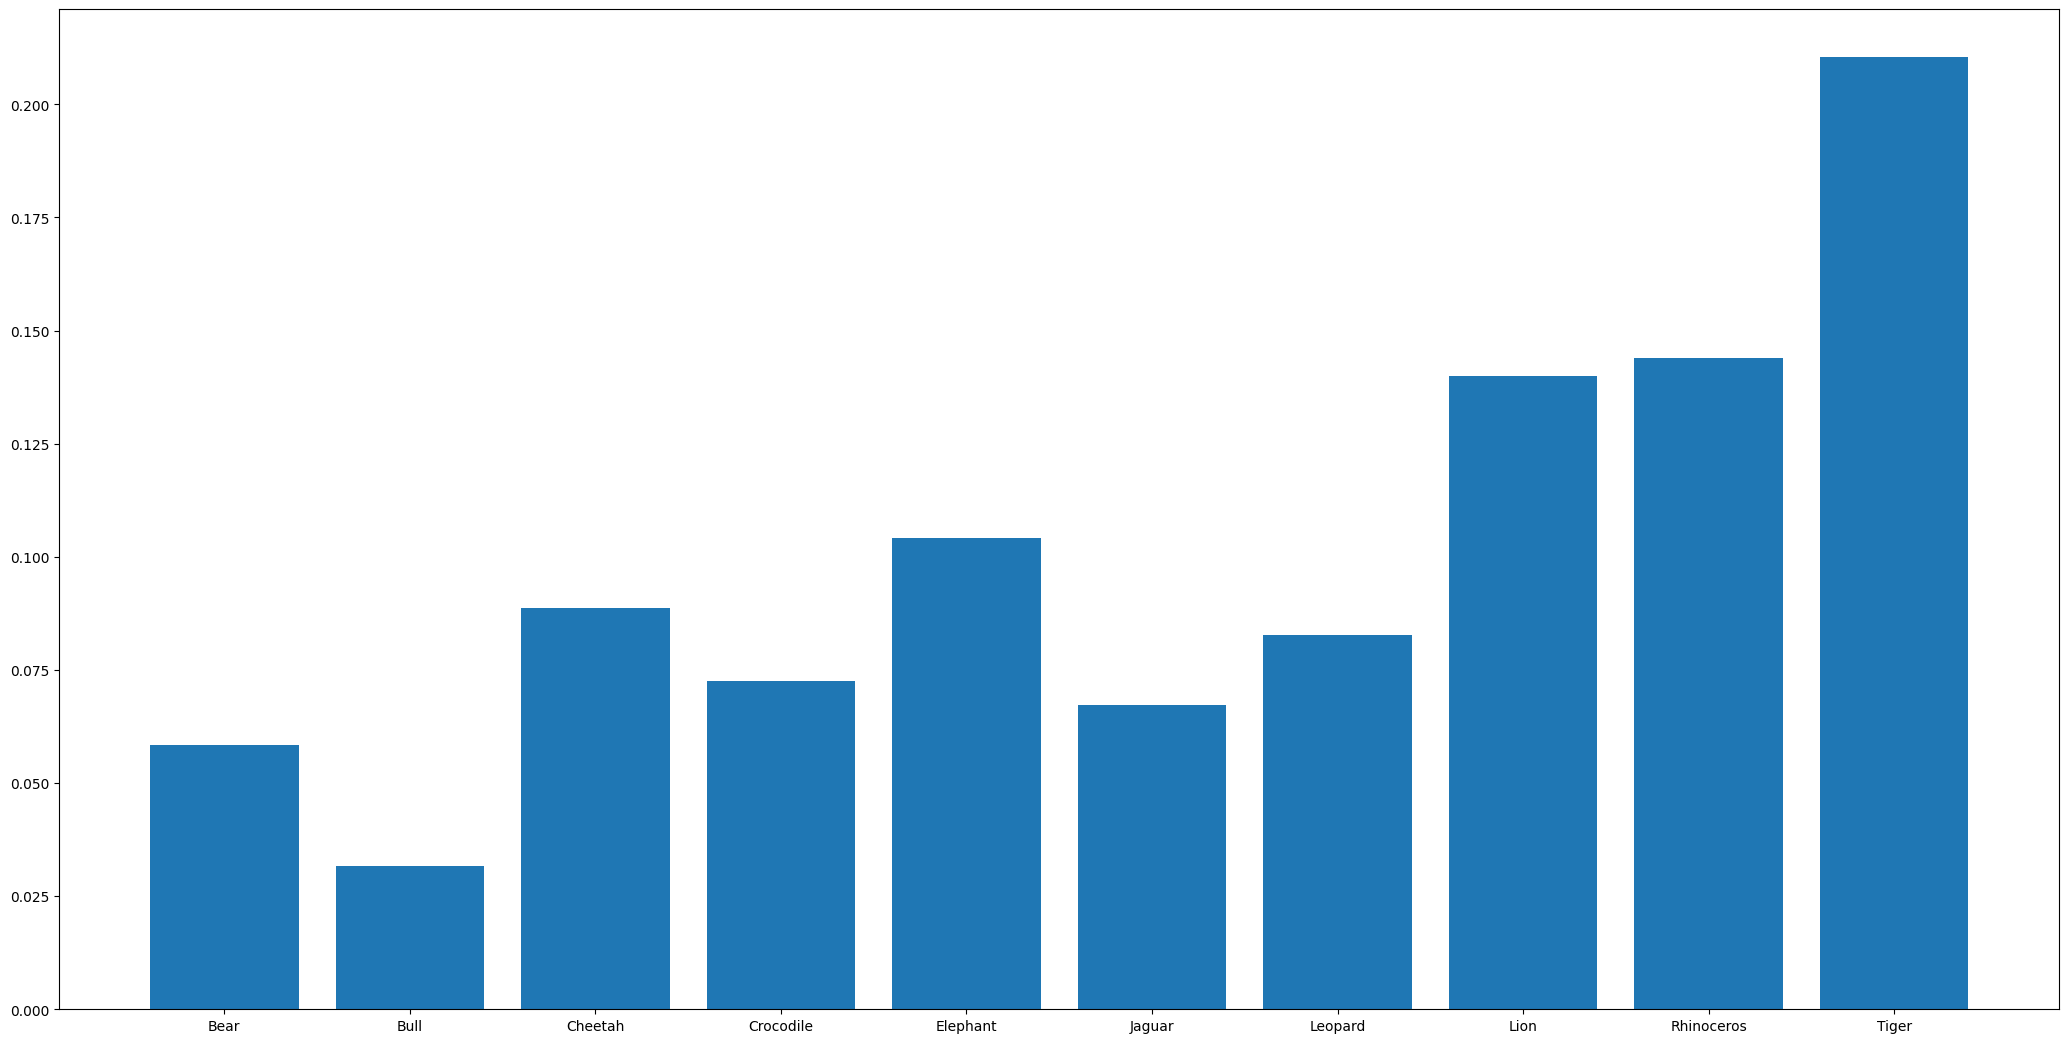

In [5]:
# Calculating and displaying the sample sizes of different animal categories in the training dataset and visualizing the distribution
train_image_bear = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Bear"))-1
train_image_bull = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Bull"))-1
train_image_cheetah = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Cheetah"))-1
train_image_crocodile = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Crocodile"))-1
train_image_elephant = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Elephant"))-1
train_image_jaguar = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Jaguar"))-1
train_image_leopard = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Leopard"))-1
train_image_lion = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Lion"))-1
train_image_rhinoceros = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Rhinoceros"))-1
train_image_tiger = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/train/Tiger"))-1
print("Bear sample size : ",train_image_bear,"\n")
print("Bull sample size : ",train_image_bull,"\n")
print("Cheetah sample size : ",train_image_cheetah,"\n")
print("Crocodile sample size : ",train_image_crocodile,"\n")
print("Elephant sample size : ",train_image_elephant,"\n")
print("Jaguar sample size : ",train_image_jaguar,"\n")
print("Leopard sample size : ",train_image_leopard,"\n")
print("Lion sample size : ",train_image_lion,"\n")
print("Rhinoceros sample size : ",train_image_rhinoceros,"\n")
print("Tiger sample size : ",train_image_tiger,"\n")
training_data_size = train_image_bear+train_image_bull+train_image_cheetah+train_image_crocodile+train_image_elephant+train_image_jaguar+train_image_leopard+train_image_lion+train_image_rhinoceros+train_image_tiger
occurences = [train_image_bear/training_data_size ,train_image_bull/training_data_size ,train_image_cheetah/training_data_size ,train_image_crocodile/training_data_size ,train_image_elephant/training_data_size ,train_image_jaguar/training_data_size,train_image_leopard/training_data_size,train_image_lion/training_data_size,train_image_rhinoceros/training_data_size,train_image_tiger/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Rhinoceros","Tiger"],occurences)

Bear sample size :  39 

Bull sample size :  73 

Cheetah sample size :  35 

Crocodile sample size :  76 

Elephant sample size :  33 

Jaguar sample size :  38 

Leopard sample size :  57 

Lion sample size :  100 

Rhinoceros sample size :  34 

Tiger sample size :  26 

validation data size: 511


<BarContainer object of 10 artists>

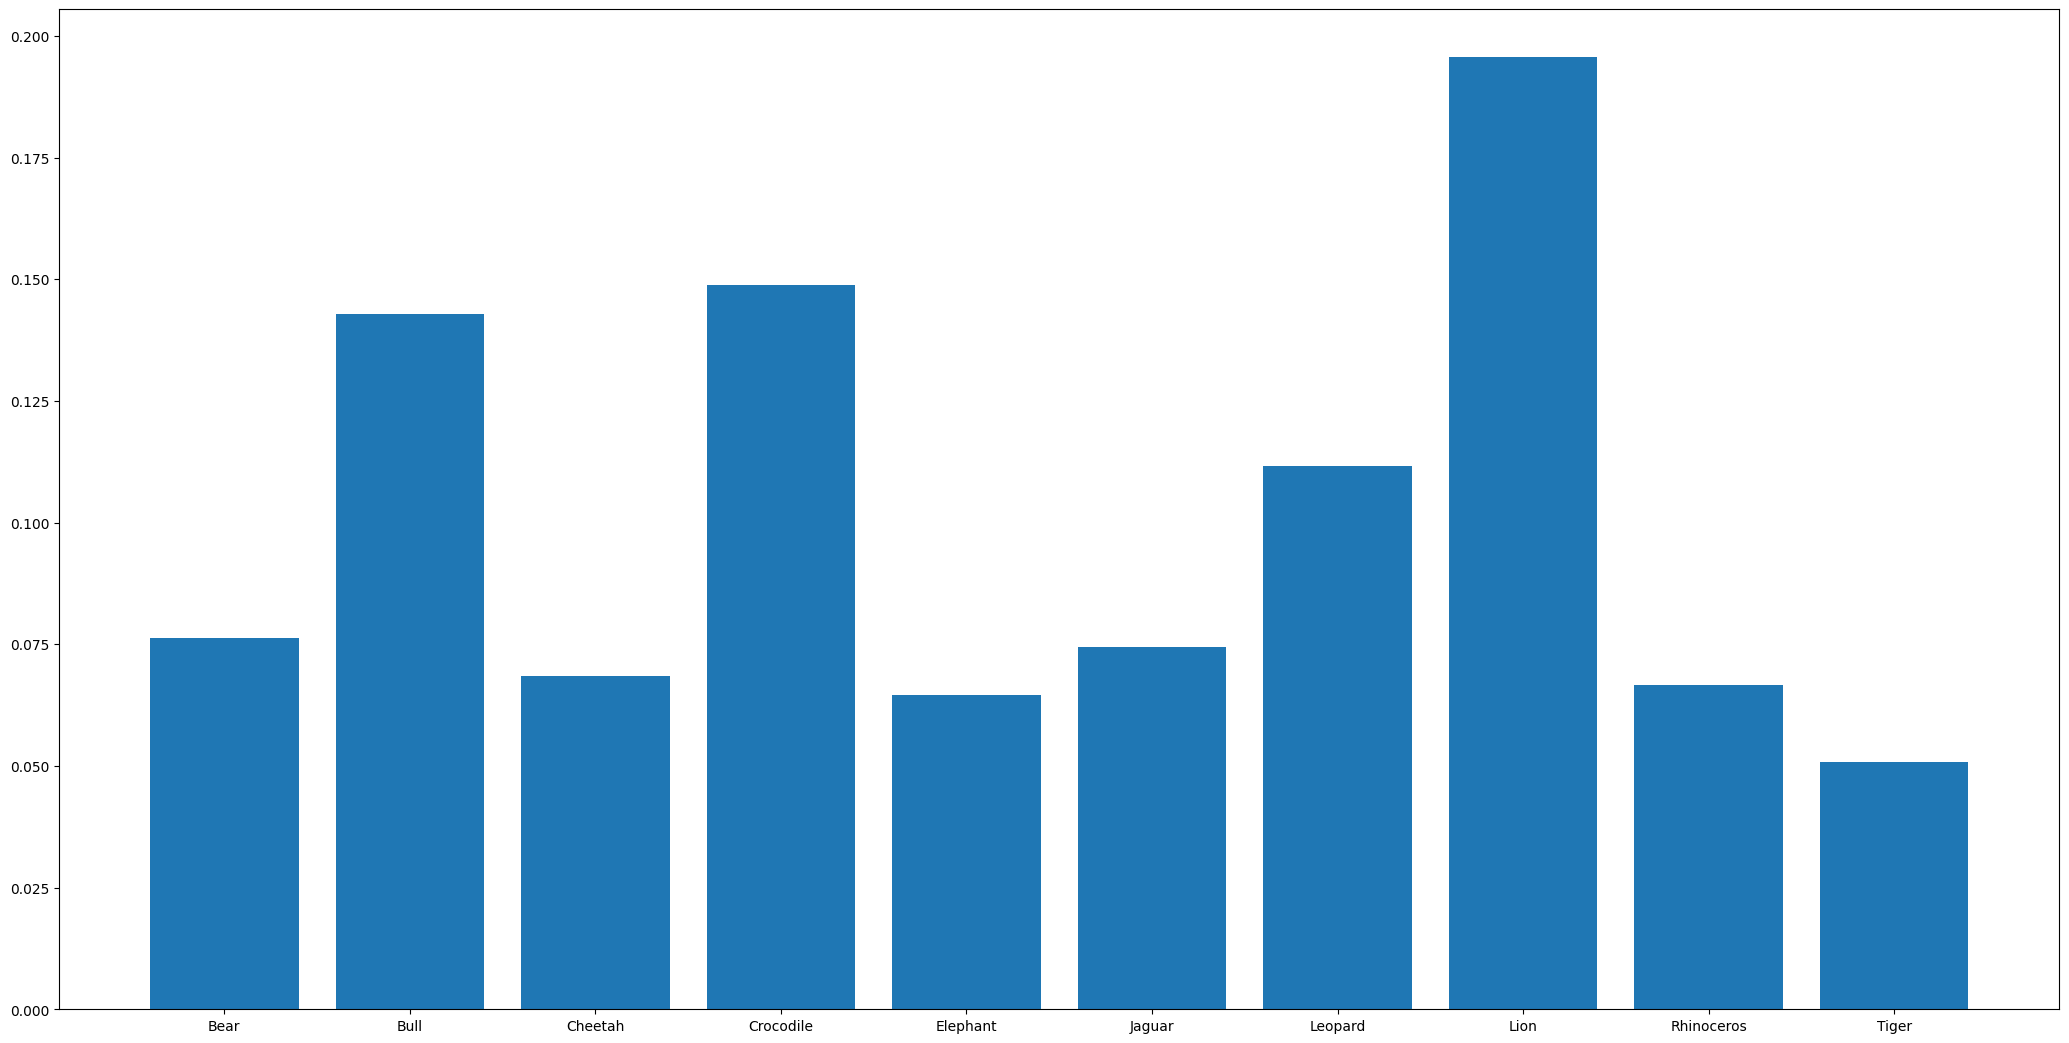

In [6]:
# Calculating and displaying the sample sizes of different animal categories in the testing dataset and visualizing the distribution
test_image_bear = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Bear"))-1
test_image_bull = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Bull"))-1
test_image_cheetah = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Cheetah"))-1
test_image_crocodile = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Crocodile"))-1
test_image_elephant = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Elephant"))-1
test_image_jaguar = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Jaguar"))-1
test_image_leopard = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Leopard"))-1
test_image_lion = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Lion"))-1
test_image_rhinoceros = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Rhinoceros"))-1
test_image_tiger = len(os.listdir("/content/drive/MyDrive/MyAnimalsDataset/test/Tiger"))-1
print("Bear sample size : ",test_image_bear,"\n")
print("Bull sample size : ",test_image_bull,"\n")
print("Cheetah sample size : ",test_image_cheetah,"\n")
print("Crocodile sample size : ",test_image_crocodile,"\n")
print("Elephant sample size : ",test_image_elephant,"\n")
print("Jaguar sample size : ",test_image_jaguar,"\n")
print("Leopard sample size : ",test_image_leopard,"\n")
print("Lion sample size : ",test_image_lion,"\n")
print("Rhinoceros sample size : ",test_image_rhinoceros,"\n")
print("Tiger sample size : ",test_image_tiger,"\n")
validation_data_size = test_image_bear+test_image_bull+test_image_cheetah+test_image_crocodile+test_image_elephant+test_image_jaguar+test_image_leopard+test_image_lion+test_image_rhinoceros+test_image_tiger
occurences = [test_image_bear/validation_data_size ,test_image_bull/validation_data_size ,test_image_cheetah/validation_data_size ,test_image_crocodile/validation_data_size ,test_image_elephant/validation_data_size ,test_image_jaguar/validation_data_size,test_image_leopard/validation_data_size,test_image_lion/validation_data_size,test_image_rhinoceros/validation_data_size,test_image_tiger/validation_data_size]
print("validation data size:",validation_data_size)

fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Rhinoceros","Tiger"],occurences)


In [7]:
# Defining a list of animal categories to detect
animals_to_detect = ["Bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Rhinoceros","Tiger"]

In [8]:
# Creating directories for organizing YOLO training and testing data
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [9]:
# Preprocessing and resizing images for YOLO training and testing
size = (640,640)
for animal_specie in animals_to_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img)

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img)

In [10]:
# Defining a list of animal categories to detect and their corresponding encodings
animals_to_detect = ["Bear","Bull","Cheetah","Crocodile","Elephant","Jaguar","Leopard","Lion","Rhinoceros","Tiger"]
animals_encoding = {"Bear":0,"Bull":1,"Cheetah":2,"Crocodile":3,"Elephant":4,"Jaguar":5,"Leopard":6,"Lion":7,"Rhinoceros":8,"Tiger":9}

In [11]:
# Processing labeling files to generate output files with encoded bounding box coordinates
def process_files(input_files_path, output_files_path):
    for animal_specie in animals_to_detect:
        print(animal_specie)
        txt_file_name = os.listdir(input_files_path + "/" + animal_specie + "/Label")
        print(txt_file_name)
        for i in range(0, len(txt_file_name)):
            with open(input_files_path + "/" + animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                with open(output_files_path + "/" + txt_file_name[i], "w") as destination:
                    image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                    img = cv2.imread(input_files_path + "/" + animal_specie + "/" + image_file_name_no_ext + ".jpg", cv2.IMREAD_COLOR)
                    height = img.shape[0]
                    width = img.shape[1]
                    for line in source:
                        labeling_data = line.split()
                        labeling_data = list(re.findall(r"(\w+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)", line)[0])
                        label = labeling_data[0].strip()
                        if label in animals_encoding:
                            labeling_data[0] = animals_encoding[label]
                            xmin = float(labeling_data[1])
                            ymin = float(labeling_data[2])
                            xmax = float(labeling_data[3])
                            ymax = float(labeling_data[4])
                            cx = (xmin + xmax) / 2.0 / width
                            cy = (ymin + ymax) / 2.0 / height
                            box_width = (xmax - xmin) / width
                            box_height = (ymax - ymin) / height
                            destination.write(str(labeling_data[0]) + " ")
                            destination.write(str(cx) + " ")
                            destination.write(str(cy) + " ")
                            destination.write(str(box_width) + " ")
                            destination.write(str(box_height) + "\n")

In [12]:
# Processing the labeling files in the training dataset and generating output files with encoded bounding box coordinates in the "yolo/train/labels" directory
process_files("/content/drive/MyDrive/MyAnimalsDataset/train","yolo/train/labels")

Bear
['0155b267ade95d1e.txt', '01650042709e7a82.txt', '02d4376234375c2f.txt', '02f783a758aec795.txt', '0312356c607c20dc.txt', '04af0dc0511cb98d.txt', '04e79e5f419a711a.txt', '0594ed3b52d3c222.txt', '05d7d61e5e8a8169.txt', '060e6719ae46dea6.txt', '06707f578721048c.txt', '073f21a5b0fa62dc.txt', '079e864735144122.txt', '07e64bb137734dbf.txt', '082849a1549c56b7.txt', '0a85e62973f2bcf6.txt', '0beb68cc85f20f4c.txt', '0c00c86cca098160.txt', '0c367abe78cbcf6d.txt', '0cb082f518f55fc3.txt', '0e656ab17f715b23.txt', '0e908c10c31c54d5.txt', '0fb433aa35b7d44a.txt', '112076aeba9d4d0c.txt', '1131287683bc922c.txt', '12543cb664a87734.txt', '127ce2dec6c6978f.txt', '15d276d673cf5de5.txt', '17aa9d00d16ef360.txt', '17b4237cafa91eb3.txt', '17c823ab5eeb6a69.txt', '19ae56cc2d93a9bf.txt', '1aa1ff24b8e00fc1.txt', '20500caecb550ddf.txt', '217b1cf5a47223cc.txt', '26cf30a2c11b09ed.txt', '28094041a4a51400.txt', '28730164e406e4ac.txt', '29581b154cf9ef55.txt', '2e2e26a9c8d4c609.txt', '34d2f34ce7edc12c.txt', '4307ec32a

In [13]:
# Processing the labeling files in the testing dataset and generating output files with encoded bounding box coordinates in the "yolo/test/labels" directory
process_files("/content/drive/MyDrive/MyAnimalsDataset/test","yolo/test/labels")

Bear
['0df78ee76bafd3a9.txt', '0f899aca6d0fb6e1.txt', '1cca48c57103a42c.txt', '1fa809bf6cf5ea36.txt', '200046eca85cd992.txt', '23bf858cb1d0ef63.txt', '23d1d39d81d411da.txt', '322e901e952ea866.txt', '3d77555f2ede0b38.txt', '3df2b6a098712fee.txt', '41b188a87b9cb7d9.txt', '50100f0b149c5668.txt', '5e4722478ab9c699.txt', '685ec158610ee9c3.txt', '6c413bd13881e4ea.txt', '77d8f1427530d52c.txt', '835f500b4f18425a.txt', '84c540da3f9e5436.txt', '8c3a0db73abdfed4.txt', '981ff8cfd891a39a.txt', '9e411cef88b11bb7.txt', 'a043c1c94c493735.txt', 'a725b87082af9473.txt', 'aadda77be1e8bc0b.txt', 'ab68f7a2c2575ff6.txt', 'ae4e59f858eb042a.txt', 'aea7138636948eee.txt', 'b2d92399ba4b0328.txt', 'bb2d5daedea06da5.txt', 'bcd925c7811ff07b.txt', 'c087a950d5217c13.txt', 'c95acf66771a868e.txt', 'cb48bf7102604c06.txt', 'cbcd47e43104de25.txt', 'de4f80f11b9dcb1b.txt', 'eab56e74f42e5286.txt', 'ee8b8d14a20aaca8.txt', 'f0cd1050b09dd625.txt', 'fc5221a9c7909df6.txt']
Bull
['04d9cced0dd42e6c.txt', '089cef3acc866627.txt', '0e2

In [14]:
# Cloning the YOLOv5 repository, navigating to the cloned directory, and installing the required dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16000, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 16000 (delta 103), reused 130 (delta 85), pack-reused 15831
Receiving objects: 100% (16000/16000), 14.59 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (10977/10977), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.9 MB/s eta 0:00:00


In [15]:
# Creating an empty "animals.yaml" file in the "data" directory and listing the contents of the "data" directory
!touch data/animals.yaml
%ls data

animals.yaml      coco.yaml             images/          VisDrone.yaml
Argoverse.yaml    GlobalWheat2020.yaml  Objects365.yaml  VOC.yaml
coco128-seg.yaml  hyps/                 scripts/         xView.yaml
coco128.yaml      ImageNet.yaml         SKU-110K.yaml


In [16]:
# Creating and writing the content to the "animals.yaml" file, specifying the paths, image sets, and class names
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Bear"+"\n")
    yaml_file.write(" 1: Bull"+"\n")
    yaml_file.write(" 2: Cheetah"+"\n")
    yaml_file.write(" 3: Crocodile"+"\n")
    yaml_file.write(" 4: Elephant"+"\n")
    yaml_file.write(" 5: Jaguar"+"\n")
    yaml_file.write(" 6: Leopard"+"\n")
    yaml_file.write(" 7: Lion"+"\n")
    yaml_file.write(" 8: Rhinoceros"+"\n")
    yaml_file.write(" 9: Tiger"+"\n")

In [17]:
# Initiating the training process for the YOLOv5 model with specified configurations and parameters
!python train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5s.pt --project runs/train

train: weights=yolov5s.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-186-g0acc5cf Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [18]:
# Copying the best weights file from the training directory to the specified locations (optional)
%cp /content/yolov5/runs/train/exp/weights/best.pt /content/
%cp /content/yolov5/runs/train/exp/weights/best.pt "/content/drive/MyDrive/Colab Notebooks"

In [19]:
# Copying the 'yolo' and 'yolov5' directories to a specific location (optional)
%cp -r /content/yolo "/content/drive/MyDrive/Colab Notebooks/yolo"
%cp -r /content/yolov5 "/content/drive/MyDrive/Colab Notebooks/yolov5"

In [ ]:
# Predict animal and give warning
# Note: This code is recommended to be run on a local machine due to hardware requirements and access to files (sound file)
import cv2
import torch
import numpy as np
import tkinter as tk
import time
import pygame

class_names = ["Bear", "Bull", "Cheetah", "Crocodile", "Elephant", "Jaguar", "Leopard", "Lion", "Rhinoceros", "Tiger"]

camera = cv2.VideoCapture(0)
pop_up_shown = False
pop_up_last_time = 0

def show_alert(animal_class):
    play_alert_sound()  # Play the alert sound
    root = tk.Tk()
    root.title("Animal Alert")
    alert_label = tk.Label(root, text=f"An {animal_class} has been detected!", font=("Helvetica", 16))
    alert_label.pack(padx=20, pady=20)
    root.after(3000, root.destroy)  # Close the pop-up after 3 seconds
    root.mainloop()

def play_alert_sound():
    pygame.mixer.init()
    pygame.mixer.music.load('voice/alarm1.wav')  # Provide the path to your alert sound file
    pygame.mixer.music.play()

def detect_objects(camera, class_names, confidence_threshold, model_path):
    global pop_up_shown, pop_up_last_time  # Declare pop_up_shown and pop_up_last_time as global variables

    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
    model.conf = confidence_threshold

    while True:
        ret, frame = camera.read()

        with torch.no_grad():
            results = model(frame)

        predictions = results.pandas().xyxy[0]
        predictions = predictions[predictions['confidence'] >= confidence_threshold]
        labels = predictions['class'].astype(int).tolist()
        boxes = predictions[['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()

        for label, box in zip(labels, boxes):
            if len(box) != 4:
                print(f"Invalid box: {box}")
                continue
            x_min, y_min, x_max, y_max = map(int, box)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(frame, class_names[label], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            if not pop_up_shown or time.time() - pop_up_last_time >= 0.5:
                animal_class = class_names[label]
                show_alert(animal_class)
                pop_up_shown = True
                pop_up_last_time = time.time()

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

# Start the initial detection process
detect_objects(camera, class_names, confidence_threshold=0.5, model_path='best.pt')